<a href="https://colab.research.google.com/github/Rexchk/Rexchk/blob/main/Emotion_Recognition_using_Lenet_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install tensorflow

In [ ]:
pip install opencv-python

In [ ]:
from zipfile import ZipFile
filename = '/content/drive/MyDrive/ckdataset.zip'
with ZipFile(filename,'r') as zip:
  zip.extractall()
  print("done")

done


In [ ]:
import keras
from keras.layers import Conv2D,MaxPooling2D,Dropout
from keras.layers import Dense,Flatten
from keras.models import Sequential

In [ ]:
import cv2
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



data_dir1 = "dataset"
labels1 = ['anger','contempt','disgust','fear','happy','sadness','surprise']
img_size = 48

def get_data(data_dir1):
  data = []
  for label in labels1:
    path = os.path.join(data_dir1,label)
    class_num = labels1.index(label)
    for img in os.listdir(path):
      try:
        img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #Convert BGR to RGB format
        resized_arr = cv2.resize(img_arr,(img_size,img_size)) #Reshaping images to preferred size
        data.append([resized_arr, class_num])
      except Exception as e:
        print(e)
    return np.array(data)

In [ ]:
train = get_data(r"/content/CK+48")
val = get_data(r"/content/ck/CK+48")
l = []
for i in train:
  if(i[1] == 0):
    l.append("anger")
  if(i[1] == 1):
    l.append("contempt")
  if(i[1] == 2):
    l.append("disgust")
  if(i[1]== 3):
    l.append("fear")
  if(i[1] == 4):
    l.append("happy")
  if(i[1] == 5):
    l.append("Sadness")
  if(i[1] == 6):
    l.append("Surprise")

<ipython-input-26-9c2eb1278fb9>:25: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


In [ ]:
x_train = []
y_train = []
x_val = []
y_valA = []

In [ ]:
#For feature-1
for feature, label in train:
  x_train.append(feature)
  y_train.append(label)

for feature, label in val:
  x_val.append(feature)
  y_valA.append(label)

In [ ]:
# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_valA)

In [ ]:
# Initialize image data generator with rescaling
train_data_gen = ImageDataGenerator(rescale=1./255,
                  rotation_range = 20,
                  zoom_range = 0.15,
                  horizontal_flip = True,
                  width_shift_range=0.2,
                  height_shift_range=0.2,
                  shear_range=0.15,
                  fill_mode = 'nearest')
validation_data_gen = ImageDataGenerator(rescale=1./255)

# Preprocess all test images
train_generator = train_data_gen.flow_from_directory(
        '/content/CK+48',
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

# Preprocess all train images
validation_generator = validation_data_gen.flow_from_directory(
        '/content/ck/CK+48',
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

Found 981 images belonging to 7 classes.
Found 981 images belonging to 7 classes.


In [ ]:
# Building the Lenet Model Architecture
model = Sequential()

model.add(Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(48,48,1)))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(16, kernel_size=(5, 5), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(4000,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1000,activation="relu"))
model.add(Dropout(0.15))
model.add(Dense(100,activation="relu"))
model.add(Dense(7, activation="sigmoid"))
model.summary()


Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 44, 44, 6)         156       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 22, 22, 6)        0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 18, 18, 16)        2416      
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 9, 9, 16)         0         
 g2D)                                                            
                                                                 
 flatten_12 (Flatten)        (None, 1296)              0         
                                                                 
 dense_48 (Dense)            (None, 4000)            

In [ ]:
# import tensorflow as tf
# model.compile(loss='sparse_categorical_crossentropy',optimizer=tf.optimizers.SGD(lr=0.000001),metrics=['accuracy'])
# model.summary()

# train_ds = tf.data.Dataset.from_tensor_slices((x_train,y_train))
# test_ds = tf.data.Dataset.from_tensor_slices((x_val,y_val))

# def process_image(image,label):
#   image=tf.image.per_image_standardization(image)
#   image=tf.image.resize(image,(48,48))
#   return image,label


# train_ds_size=tf.data.experimental.cardinality(train_ds).numpy()
# test_ds_size=tf.data.experimental.cardinality(test_ds).numpy()
# print('Train size:',train_ds_size)
# print('Test size:',test_ds_size)

# train_ds=(train_ds.map(process_image).shuffle(buffer_size=train_ds_size).batch(batch_size=32,drop_remainder=True))
# test_ds=(test_ds.map(process_image).shuffle(buffer_size=test_ds_size).batch(batch_size=32,drop_remainder=True))
 

In [ ]:
# from keras.optimizers import Adam
# opt = Adam(lr=0.000001)
# model.compile(optimizer = opt, loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics = ['accuracy'])

In [ ]:
# history = model.fit(x_train,y_train,epochs = 100 , validation_data = (x_val, y_val))

In [ ]:
from keras.optimizers import Adam
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0002), metrics=['accuracy'])

# Train the neural network/model
emotion_model_info=model.fit(
        train_generator,
        steps_per_epoch=981 // 64,
        epochs=50,
        validation_data=validation_generator,
        validation_steps=981 // 64)

Epoch 1/50
15/15 [==============================] - 2s 109ms/step - loss: 1.8392 - accuracy: 0.2377 - val_loss: 1.8185 - val_accuracy: 0.2146
Epoch 2/50
15/15 [==============================] - 1s 81ms/step - loss: 1.8018 - accuracy: 0.2443 - val_loss: 1.7786 - val_accuracy: 0.3979
Epoch 3/50
15/15 [==============================] - 1s 80ms/step - loss: 1.7648 - accuracy: 0.2955 - val_loss: 1.7156 - val_accuracy: 0.3375
Epoch 4/50
15/15 [==============================] - 1s 95ms/step - loss: 1.7453 - accuracy: 0.3315 - val_loss: 1.6546 - val_accuracy: 0.3917
Epoch 5/50
15/15 [==============================] - 2s 112ms/step - loss: 1.6767 - accuracy: 0.3566 - val_loss: 1.5702 - val_accuracy: 0.5333
Epoch 6/50
15/15 [==============================] - 1s 80ms/step - loss: 1.6553 - accuracy: 0.3828 - val_loss: 1.4584 - val_accuracy: 0.4958
Epoch 7/50
15/15 [==============================] - 1s 98ms/step - loss: 1.5929 - accuracy: 0.3980 - val_loss: 1.3660 - val_accuracy: 0.4948
Epoch 8/50


In [ ]:
m_json = model.to_json()  
with open("m.json", "w") as json_file:  
    json_file.write(m_json)  
model.save_weights("Lenet_Detection.h5")

In [ ]:
import matplotlib.pyplot as plt
acc = emotion_model_info.history['accuracy']
val_acc = emotion_model_info.history['val_accuracy']
loss = emotion_model_info.history['loss']
val_loss = emotion_model_info.history['val_loss']

epochs_range = range(50)

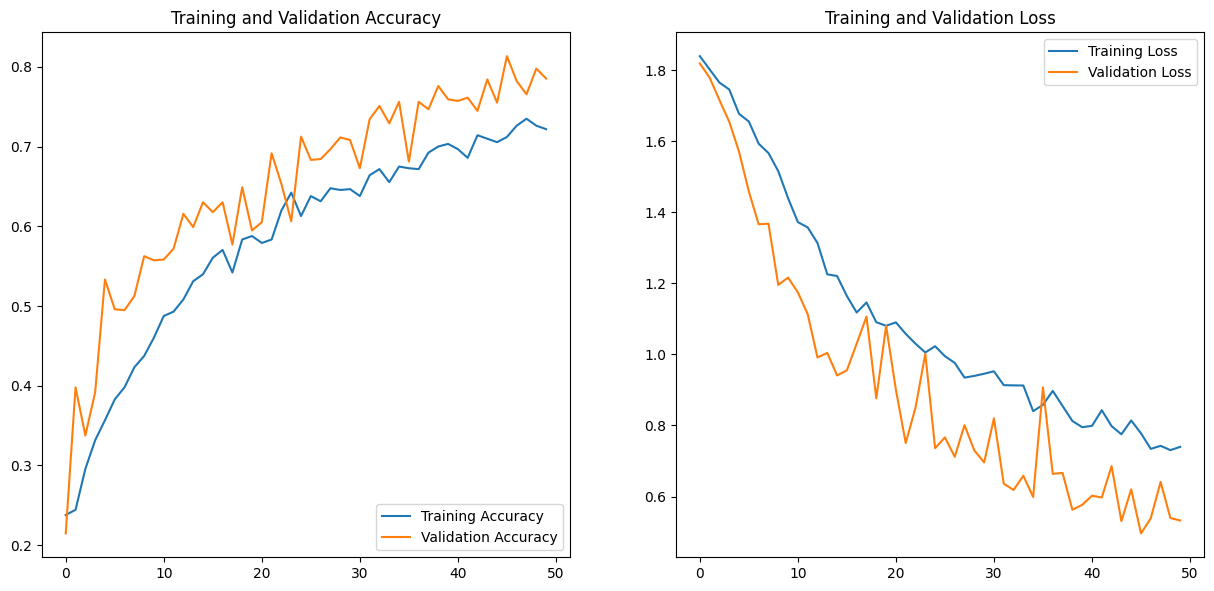

In [ ]:
plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Loaded model from disk
Found 981 images belonging to 7 classes.


<ipython-input-91-27bdc4197353>:32: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = emotion_model.predict_generator(test_generator)


-----------------------------------------------------------------
[[29  2 24  3 31 11 35]
 [ 8  2  7  3 18  1 15]
 [37  5 23  3 43 11 55]
 [19  3 11  4 12  7 19]
 [30  2 37  3 52 15 68]
 [16  5 10  2 20  4 27]
 [53 10 28  8 58 14 78]]


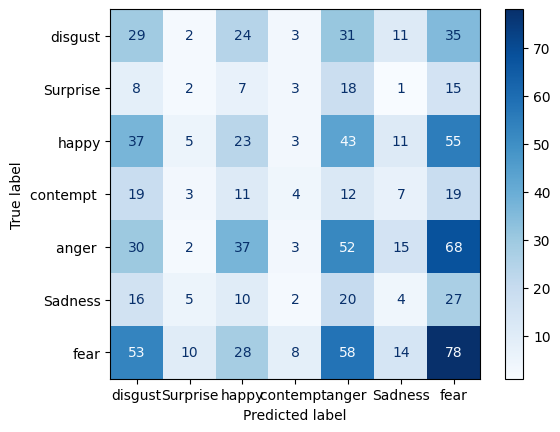

-----------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.15      0.21      0.18       135
           1       0.07      0.04      0.05        54
           2       0.16      0.13      0.15       177
           3       0.15      0.05      0.08        75
           4       0.22      0.25      0.24       207
           5       0.06      0.05      0.05        84
           6       0.26      0.31      0.29       249

    accuracy                           0.20       981
   macro avg       0.16      0.15      0.15       981
weighted avg       0.18      0.20      0.19       981



In [ ]:
import numpy as np
from keras.models import model_from_json
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay


emotion_dict = { "anger ","contempt ","disgust","fear","happy","Sadness","Surprise"}

# load json and create model
json_file = open('m.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
emotion_model = model_from_json(loaded_model_json)

# load weights into new model
emotion_model.load_weights("Lenet_Detection.h5")
print("Loaded model from disk")

# Initialize image data generator with rescaling
test_data_gen = ImageDataGenerator(rescale=1./255)

# Preprocess all test images
test_generator = test_data_gen.flow_from_directory(
        '/content/ck/CK+48',
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

# do prediction on test data
predictions = emotion_model.predict_generator(test_generator)

# see predictions
# for result in predictions:
#     max_index = int(np.argmax(result))
#     print(emotion_dict[max_index])

print("-----------------------------------------------------------------")
# confusion matrix
c_matrix = confusion_matrix(test_generator.classes, predictions.argmax(axis=1))
print(c_matrix)
cm_display = ConfusionMatrixDisplay(confusion_matrix=c_matrix, display_labels= emotion_dict)
cm_display.plot(cmap=plt.cm.Blues)
plt.show()

# Classification report
print("-----------------------------------------------------------------")
print(classification_report(test_generator.classes, predictions.argmax(axis=1)))
